In [ ]:
import sys
import os
build_path = os.path.join(os.getcwd(), "..", "build")
!cmake -B {build_path} -DPYTHON_EXECUTABLE={sys.executable} -Wno-dev -DCMAKE_BUILD_TYPE=Release ..
!cmake --build {build_path}
if build_path not in sys.path:
    sys.path.append(build_path)
import pypumila
# to reload pypumila, restart python kernel.
# importlib.reload(pypumila) <- does not work

In [2]:
os.chdir(build_path)
sim = pypumila.GameSim()

In [3]:
import numpy as np

In [4]:
from tqdm.notebook import tqdm

In [5]:
import random

In [6]:
models = []
rewards = []
scores = []

In [9]:
# for i, hidden in enumerate(range(200, 1200, 200)):
def learn(hidden):
    print(f"hidden = {int(hidden)}")
    model = pypumila.Pumila8.make_shared(int(hidden))
    models.append(model)
    it = 100000
    reward = []
    score = []
    rewards.append(reward)
    scores.append(score)
    with tqdm(total=it) as pbar:
        while pbar.n < it:
            sim = pypumila.GameSim()
            rnd_p = random.random()
            # print(rnd_p)
            for e in range(50):
                sim.step()
                pbar.update()
                field = sim.field_copy()
                reward.append(model.calc_reward(field))
                a = model.get_action_rnd(field, rnd_p)
                model.learn_step(field)
                # diff = model.mean_diff
                sim.put(pypumila.actions[a])
                while not sim.is_free_phase():
                    sim.step()
            score.append(sim.field_copy().total_score)
    model.save_file(f"pumila8_{hidden}")

In [10]:
learn(200)
learn(400)
learn(600)
learn(800)

hidden = 200


  0%|          | 0/100000 [00:00<?, ?it/s]

hidden = 400


  0%|          | 0/100000 [00:00<?, ?it/s]

hidden = 600


  0%|          | 0/100000 [00:00<?, ?it/s]

hidden = 800


  0%|          | 0/100000 [00:00<?, ?it/s]

In [ ]:
# del models[-1]
# del models_first[-1]
# del rewards[-1]
# del scores[-1]

In [11]:
import matplotlib.pyplot as plt

In [12]:
label = [200, 400, 600, 800]

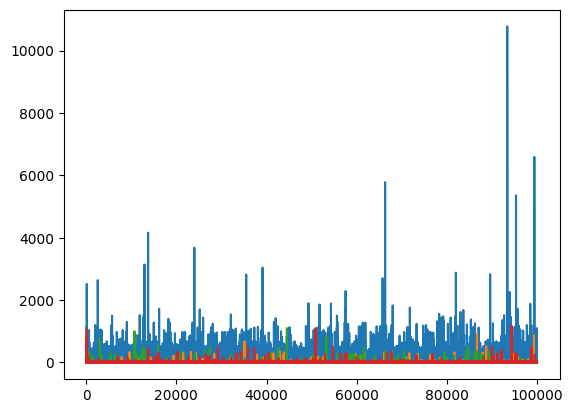

In [27]:
plt.plot(np.array(rewards).T, label=label)

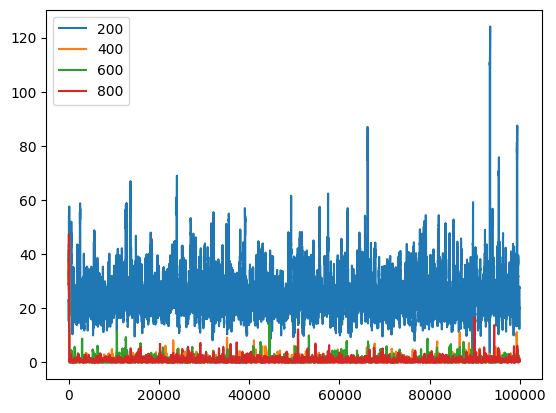

In [32]:
ar = np.array(rewards)
plt.plot(
    np.array([[np.average(ar[j, i:i+100]) for i in range(len(rewards[j])-100)] for j in range(len(rewards))]).T,
    label=label
)
plt.legend()

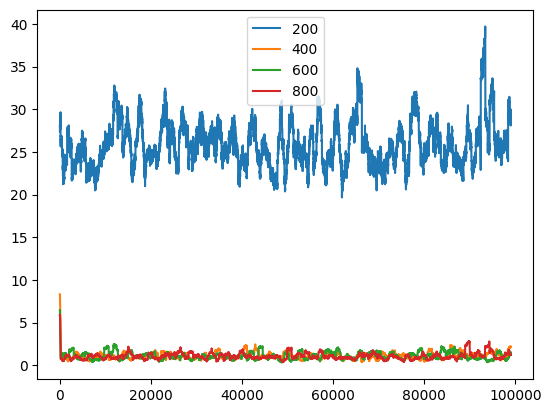

In [33]:
ar = np.array(rewards)
plt.plot(
    np.array([[np.average(ar[j, i:i+1000]) for i in range(len(rewards[j])-1000)] for j in range(len(rewards))]).T,
    label=label
)
plt.legend()

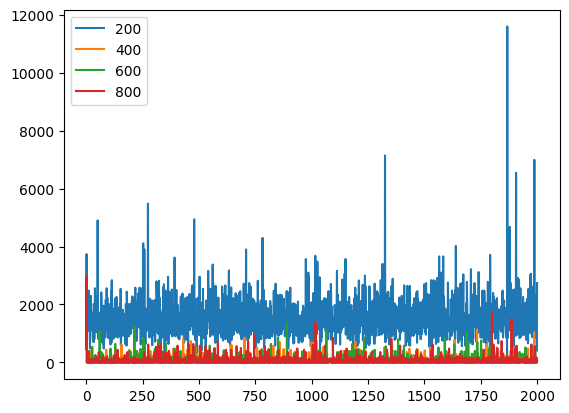

In [34]:
plt.plot(np.array(scores).T, label=label)
plt.legend()

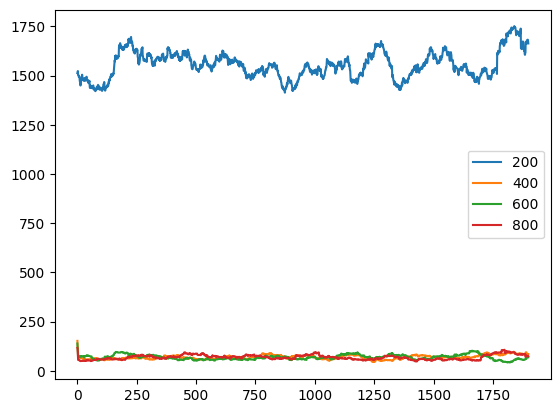

In [35]:
ar = np.array(scores)
plt.plot(
    np.array([[np.average(ar[j, i:i+100]) for i in range(len(scores[j])-100)] for j in range(len(scores))]).T,
    label=label
)
plt.legend()

In [ ]:
models = []
for i in range(7):
    models.append(pypumila.Pumila7.make_shared(1))
    models[i].load_file(f"pumila8_{i}")

In [36]:
sim = pypumila.GameSim()
win = pypumila.Window(sim)
win.step(False)

In [37]:
while True:
    a = models[0].get_action(sim)
    sim.put(pypumila.actions[a])
    # sim.soft_put(pypumila.actions[a])
    while sim.is_free_phase():
        win.step(True)
    while not sim.is_free_phase():
        win.step(True)
    # for i in range(15):
    #     win.step(True)

KeyboardInterrupt: 

In [38]:
win.quit()